In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data_train = pd.read_csv('./dataset/Multiplication_Table_train.csv')
data_test = pd.read_csv('./dataset/Multiplication_Table_test.csv')

In [3]:
data_train.head()


,a,b,result
0,1,1,1
1,1,2,2
2,1,3,3
3,1,4,4
4,1,5,5


In [4]:
data_test.head()
data_test

,a,b,result
0,1.0,2.0,2.0
1,2.0,3.0,6.0
2,4.0,5.0,20.0
3,8.0,9.0,72.0
4,7.0,6.0,42.0
5,4.0,2.0,8.0
6,4.0,3.0,12.0
7,8.0,9.0,72.0
8,6.0,6.0,36.0
9,5.0,2.0,10.0


In [5]:
regression=linear_model.LinearRegression()
regression.fit(data_train[['a', 'b']], data_train.result)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
regression.coef_

array([5.60587501, 5.4566233 ])

In [7]:
regression.intercept_

-30.87358722855099

In [8]:
print("5 * 6 = ",regression.predict([[5,6 ]]))

5 * 6 =  [29.89552763]


In [9]:
print("2.5 * 6 = ",regression.predict([[2.5,6 ]]))

2.5 * 6 =  [15.8808401]


In [10]:
predictions=regression.predict(data_test[['a', 'b']])
# The coefficients
print('Coefficients: \n', regression.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(data_test.result, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_test.result, predictions))

Coefficients: 
 [5.60587501 5.4566233 ]
Mean squared error: 192.04
Variance score: 0.62


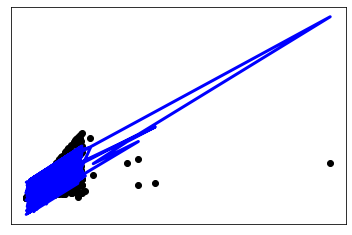

In [11]:
# Plot outputs
plt.scatter(data_test[['a']], data_test.result,  color='black')
plt.plot(data_test[['a']], predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [12]:
regression.predict(data_test[['a', 'b']]) # Predict unkown data

array([-1.43544656e+01, -3.29196730e+00,  1.88330293e+01,  6.30830226e+01,
        4.11072777e+01,  2.46315942e+00,  7.91978272e+00,  6.30830226e+01,
        3.55014026e+01,  8.06903443e+00,  3.50536475e+01,  2.45881560e+01,
        3.03432828e+01,  2.47374078e+01,  4.12565294e+01,  1.88330293e+01,
        1.83852742e+01,  3.04925345e+01,  3.01940311e+01,  2.98955276e+01,
        2.31390771e+00,  2.39911492e+01,  4.08087742e+01,  1.91315327e+01,
        4.06595225e+01,  4.11072777e+01,  1.35256577e+01,  7.91978272e+00,
        1.30779026e+01,  2.38418975e+01,  8.06903443e+00, -8.59933889e+00,
        4.15550328e+01,  3.59491578e+01,  3.00447793e+01,  1.92807845e+01,
        1.85345259e+01,  1.91315327e+01, -8.59933889e+00,  4.06595225e+01,
        8.06903443e+00,  2.45881560e+01,  4.65639010e+01,  6.30830226e+01,
        5.76263993e+01,  5.23190277e+01,  3.06417862e+01,  4.15550328e+01,
        4.06595225e+01,  4.68624044e+01,  1.91315327e+01,  5.74771476e+01,
        6.86888976e+01, -

In [13]:
new_data_test=list(zip(data_test.a, data_test.b, data_test.result, predictions))
df=pd.DataFrame(new_data_test, columns=['a','b', 'result' ,'predictions'])

In [14]:
df

,a,b,result,predictions
0,1.0,2.0,2.0,-14.354466
1,2.0,3.0,6.0,-3.291967
2,4.0,5.0,20.0,18.833029
3,8.0,9.0,72.0,63.083023
4,7.0,6.0,42.0,41.107278
5,4.0,2.0,8.0,2.463159
6,4.0,3.0,12.0,7.919783
7,8.0,9.0,72.0,63.083023
8,6.0,6.0,36.0,35.501403
9,5.0,2.0,10.0,8.069034


In [15]:
predictions=regression.predict(data_train[['a', 'b']])
# The coefficients
print('Coefficients: \n', regression.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(data_train.result, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_train.result, predictions))

Coefficients: 
 [5.60587501 5.4566233 ]
Mean squared error: 67.97
Variance score: 0.88


In [16]:
new_data_train=list(zip(data_train.a, data_train.b, data_train.result, predictions))
df1=pd.DataFrame(new_data_train, columns=['a','b', 'result' ,'predictions'])
df1

,a,b,result,predictions
0,1,1,1,-19.811089
1,1,2,2,-14.354466
2,1,3,3,-8.897842
3,1,4,4,-3.441219
4,1,5,5,2.015404
5,1,6,6,7.472028
6,1,7,7,12.928651
7,1,8,8,18.385274
8,1,9,9,23.841897
9,1,10,10,29.298521
